# ■復習
1回目

In [15]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(fname=csv_path, delimiter=",", skiprows=1)
# delimiterはファイルの区切り文字

In [16]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## 【問題1】データの可視化

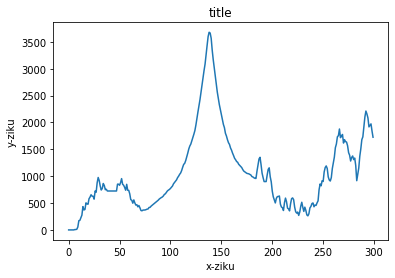

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("title")
plt.xlabel("x-ziku")
plt.ylabel("y-ziku")
plt.plot(fuji[:,0],fuji[:,3])
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

In [18]:
def slant(place_number):
    x_change = fuji[place_number, 0] - fuji[place_number-1,0]
    y_change = fuji[place_number, 3] - fuji[place_number-1,3]
    return y_change / x_change
print(slant(7))

0.5899999999999999


## 【問題3】移動先の地点を計算する関数を作成

In [19]:
#roundは正確な四捨五入ではないのでdecimalを使う
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
def next_place(place_number):
    alpha = 0.2
    slant_now = slant(place_number)
    next_point = place_number - alpha*slant_now
    if 0 <= next_point < 300:
        return int(Decimal(str(next_point)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    else:
        return int(Decimal(str(place_number)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
print(next_place(146))        

175


## 【問題4】山を下る関数を作成

In [20]:
#■補足　setは重複する要素を排除するので同じ位置に留まった場合whileが終了する

place_list = []
def climb_down(place_number=136):
    place_list = [place_number]
    while len(set(place_list)) == len(place_list):
        last_place = place_list[-1]
        place_list.append(next_place(last_place))
    return place_list

climb_down(136)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]

## 【問題5】下山過程の可視化

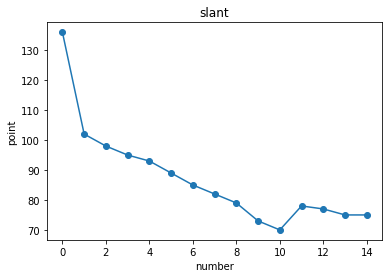

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

#まずxの値を数分用意する
x_list = []
for i in range(len(climb_down(136))):
    x_list.append(i)
               
y_list = climb_down(136)
plt.title("slant")
plt.xlabel("number")
plt.ylabel("point")
plt.plot(x_list,y_list,marker="o")
plt.show()

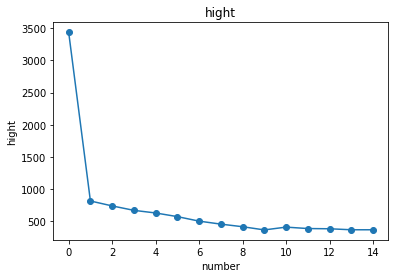

In [22]:
y_list = climb_down(136)
hight = []
for i in range(len(climb_down(136))):
    hight.append(fuji[y_list[i],3])

plt.title("hight")
plt.xlabel("number")
plt.ylabel("hight")
plt.plot(x_list,hight,marker="o")
plt.show()

## 【問題6】初期値の変更

In [25]:
for i in range(len(fuji[:,0])):
    initialize =climb_down(i)
    print(initialize)

[0, 0]
[1, 1]
[2, 2]
[3, 3]
[4, 4]
[5, 5]
[6, 5, 5]
[7, 7]
[8, 7, 7]
[9, 1, 1]
[10, 10]
[11, 10, 10]
[12, 2, 2]
[13, 4, 4]
[14, 14]
[15, 27, 31, 51, 41, 41]
[16, 14, 14]
[17, 17]
[18, 22, 13, 4, 4]
[19, 21, 15, 27, 31, 51, 41, 41]
[20, 20]
[21, 15, 27, 31, 51, 41, 41]
[22, 13, 4, 4]
[23, 28, 28]
[24, 24]
[25, 36, 52, 37, 35, 43, 43]
[26, 26]
[27, 31, 51, 41, 41]
[28, 28]
[29, 10, 10]
[30, 41, 41]
[31, 51, 41, 41]
[32, 47, 47]
[33, 27, 31, 51, 41, 41]
[34, 15, 27, 31, 51, 41, 41]
[35, 43, 43]
[36, 52, 37, 35, 43, 43]
[37, 35, 43, 43]
[38, 44, 44]
[39, 39]
[40, 40]
[41, 41]
[42, 42]
[43, 43]
[44, 44]
[45, 45]
[46, 46]
[47, 47]
[48, 22, 13, 4, 4]
[49, 49]
[50, 54, 58, 80, 80]
[51, 41, 41]
[52, 37, 35, 43, 43]
[53, 74, 74]
[54, 58, 80, 80]
[55, 63, 74, 74]
[56, 66, 74, 74]
[57, 35, 43, 43]
[58, 80, 80]
[59, 59]
[60, 73, 70, 78, 77, 75, 75]
[61, 83, 80, 80]
[62, 64, 52, 37, 35, 43, 43]
[63, 74, 74]
[64, 52, 37, 35, 43, 43]
[65, 76, 75, 75]
[66, 74, 74]
[67, 66, 74, 74]
[68, 76, 75, 75]
[69,

In [52]:
#climb_down(i)で一番大きなものをとりだす
'''
■考え方
全部で300地点ありそれぞれの地点の要素数をリストに入れていく
その中で一番数字の大きい数のインデックス番号＝下山中移動が多いスタート地点である
'''
import numpy as np
find_big =[]
for i in range(len(fuji[:,0])):
    length =len(climb_down(i))
    find_big.append(length)

len_max = np.argmax(find_big)
print(len_max)

199


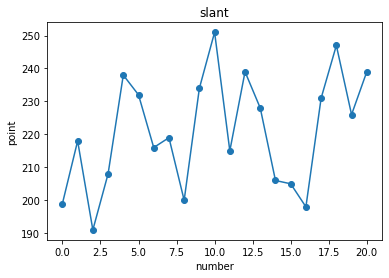

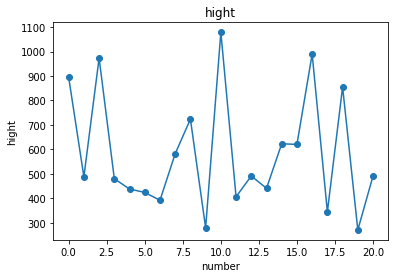

In [27]:
#199番目の降り方を見ていく
x_list1 = []
for i in range(len(climb_down(199))):
    x_list1.append(i)

y_list1 = climb_down(199)
plt.title("slant")
plt.xlabel("number")
plt.ylabel("point")
plt.plot(x_list1,y_list1,marker="o")
plt.show()

hight1 = []
for i in range(len(climb_down(199))):
    hight1.append(fuji[y_list1[i],3])

plt.title("hight")
plt.xlabel("number")
plt.ylabel("hight")
plt.plot(x_list1,hight1,marker="o")
plt.show()

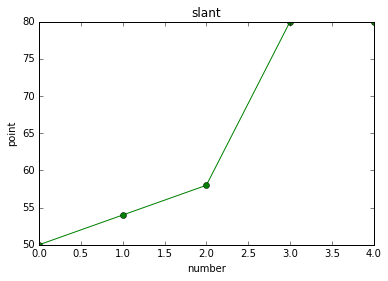

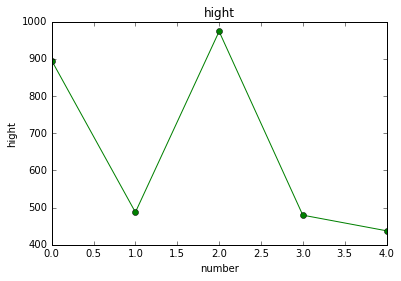

In [62]:
#次は50番目の地点から下山するとする
x_list2 = []
for i in range(len(climb_down(50))):
    x_list2.append(i)

y_list2 = climb_down(50)
plt.title("slant")
plt.xlabel("number")
plt.ylabel("point")
plt.plot(x_list2,y_list2,marker="o",color='green')
plt.show()

hight2 = []
for i in range(len(climb_down(50))):
    hight2.append(fuji[y_list1[i],3])

plt.title("hight")
plt.xlabel("number")
plt.ylabel("hight")
plt.plot(x_list2,hight2,marker="o",color='green')
plt.show()